In [1]:
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
plt.style.use('/storage/home/nxt5197/work/577_exoplanets/accretion.mplstyle')
import os
import numpy as np
import pandas as pd
import glob
import corner
import random
from PIL import Image
from PIL import ImageOps
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2022-05-04 14:33:11.634473: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-04 14:33:11.634517: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
os.getcwd()

'/storage/work/n/nxt5197/589_Machine_Learning'

In [2]:
f2_plots = sorted(glob.glob('/storage/home/nxt5197/work/589_Machine_Learning/plots/imgs/*.png'))
print(len(f2_plots))
f2_plots = sorted(glob.glob('/storage/home/nxt5197/work/PPO/TOI-216/node_by_node/blc32/Freqs_3904_to_4032/MJDate_59221/plots_TIC55652896_S_f2_snr10.0/*.png'))
print(len(f2_plots))

853
853


In [4]:
f = f2_plots[0]
f

'/storage/home/nxt5197/work/PPO/TOI-216/node_by_node/blc32/Freqs_3904_to_4032/MJDate_59221/plots_TIC55652896_S_f2_snr10.0/f2_TIC55652896_S_dr_-0.01_freq_3936.456594.png'

In [5]:
f2_plots[28]

'/storage/home/nxt5197/work/PPO/TOI-216/node_by_node/blc32/Freqs_3904_to_4032/MJDate_59221/plots_TIC55652896_S_f2_snr10.0/f2_TIC55652896_S_dr_-0.03_freq_3968.121896.png'

In [6]:
np.flatnonzero(np.core.defchararray.find(f2_plots,'freq_3968.1')!=-1)

array([28])

In [7]:
# Image.open(f2_plots[530])
len(x_train)

NameError: name 'x_train' is not defined

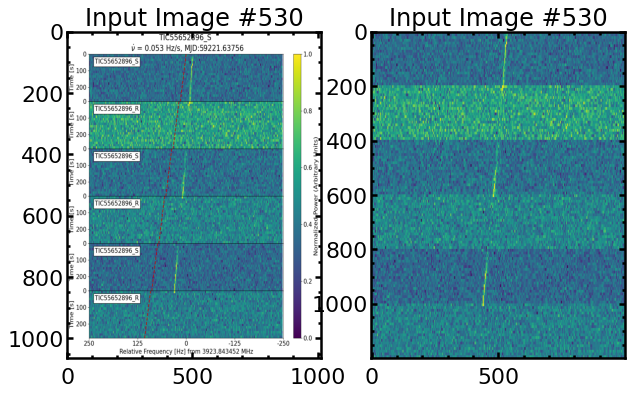

In [10]:
preprocessed_imgs=sorted(glob.glob('/storage/home/nxt5197/work/589_Machine_Learning/plots/imgs/*.png'))
# Image.open(preprocessed_imgs[530])

h=6
w=10
nrow=1
ncol=2
fig,ax=plt.subplots(figsize=(w,h),nrows=nrow,ncols=ncol)

ran = random.sample(range(len(x_train)),1)[0]
# ran=530
ran=530
# Display original
ax[0].set_title(f'Input Image #{ran}')   
img1 = Image.open(f2_plots[ran]) 
ax[0].imshow(img1,aspect='auto')
# ax[0,0].get_xaxis().set_visible(False)
# ax[0,0].get_yaxis().set_visible(False)
# Display reduced original
ax[1].set_title(f'Input Image #{ran}')
img2 = Image.open(preprocessed_imgs[ran]) 
ax[1].imshow(img2,aspect='auto')
# ax[0,1].get_xaxis().set_visible(False)
# ax[0,1].get_yaxis().set_visible(False)
plt.show()

In [ ]:
border = (88, 75, 153, 64) # left, top, right, bottom
img = Image.open(f2_plots[420])
# image.show()
cropped_img = ImageOps.crop(img, border)

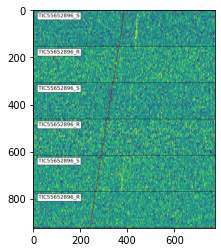

In [ ]:
plt.imshow(cropped_img)

In [ ]:
# stop = stop

In [ ]:
cropped_imgs = [0 for i in range(len(f2_plots))] 
for i,f in enumerate(f2_plots):
    border = (88, 75, 153, 64) # left, top, right, bottom
    img = Image.open(f)
    # image.show()
    cropped_imgs[i] = ImageOps.crop(img, border)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
np.asarray(cropped_imgs[0]).shape

(925, 772, 4)

In [4]:
latent_dim = 5
latent_dim = 6

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      # layers.Flatten(),
      # layers.Dense(latent_dim, activation='relu'),
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      # layers.Dense(latent_dim, activation='relu'),
      layers.Dense(latent_dim, activation='relu'),
      layers.Dense(120*250, activation='relu'),
      layers.Reshape((120, 250))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

my_optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5)
autoencoder.compile(optimizer=my_optimizer, loss=losses.MeanSquaredError())

2022-05-04 14:33:54.410019: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-04 14:33:54.410062: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-04 14:33:54.410088: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (submit-009.acib.production.int.aci.ics.psu.edu): /proc/driver/nvidia/version does not exist
2022-05-04 14:33:54.410422: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
120*250

30000

In [ ]:
# x_train = cropped_imgs[:600]
# x_test = cropped_imgs[600:]
# x_train = [np.array(np.asarray(x_train[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_train))]
# x_test = [np.array(np.asarray(x_test[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_test))]
# shapes_train = [np.shape(x_train[i]) for i in range(len(x_train))]
# shapes_test = [np.shape(x_test[i]) for i in range(len(x_test))]
# set(shapes_train),set(shapes_test)

({(925, 772)}, {(925, 772)})

In [ ]:
# shapes_train.count((925, 772)),shapes_train.count((925, 819))

(600, 0)

In [ ]:
# np.shape(x_train),np.shape(x_test)

((600, 925, 772), (253, 925, 772))

In [ ]:
# x_train = cropped_imgs[:139]+cropped_imgs[196:600]
# x_test = cropped_imgs[600:]
# x_train = [np.array(np.asarray(x_train[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_train))]
# x_test = [np.array(np.asarray(x_test[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_test))]

# x_train = np.array(x_train)[:,::34,::28]
# x_test = np.array(x_test)[:,::34,::28]

In [98]:
import keras
from keras import layers
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import MaxPooling2D, UpSampling2D
from keras.models import Model

x_train_1 = np.reshape(x_train, (len(x_train), 120, 250, 1))
x_test_1 = np.reshape(x_test, (len(x_test), 120, 250, 1))

input_img = keras.Input(shape=(120, 250, 1))

enc_conv1 = Conv2D(12, (3, 3), activation='relu', padding='same')(input_img)
enc_pool1 = MaxPooling2D((2, 2), padding='same')(enc_conv1)
enc_conv2 = Conv2D(8, (4, 4), activation='relu', padding='same')(enc_pool1)
enc_ouput = MaxPooling2D((4, 5), padding='same')(enc_conv2)

dec_conv2 = Conv2D(8, (4, 4), activation='relu', padding='same')(enc_ouput)
dec_upsample2 = UpSampling2D((2, 2))(dec_conv2)
dec_conv3 = Conv2D(12, (3, 3), activation='relu', padding='same')(dec_upsample2)
dec_upsample3 = UpSampling2D((4, 5))(dec_conv3)
dec_output = Conv2D(1, (3, 3), activation='relu', padding='same')(dec_upsample3)

autoencoder = Model(input_img, dec_output)
my_optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5)
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(optimizer=my_optimizer, loss='binary_crossentropy')
autoencoder.summary()

Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_45 (InputLayer)       [(None, 120, 250, 1)]     0         
                                                                 
 conv2d_221 (Conv2D)         (None, 120, 250, 12)      120       
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 60, 125, 12)      0         
 g2D)                                                            
                                                                 
 conv2d_222 (Conv2D)         (None, 60, 125, 8)        1544      
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 15, 25, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_223 (Conv2D)         (None, 15, 25, 8)         103

In [58]:
np.shape(x_train_1),np.shape(x_test_1)

((853, 120, 250, 1), (853, 120, 250, 1))

In [5]:
os.chdir('/storage/home/nxt5197/work/589_Machine_Learning/plots/data')
power_matrix=np.load('power_matrix.npy')
# power_matrix = np.reshape(powers,(853,120,250))
import _pickle as cPickle
power_matrix = cPickle.load( open( "power_matrix.pkl", "rb" ) )
x_train = power_matrix#[:600]
x_test = power_matrix#[600:]
np.shape(x_train)

(853, 120, 250)

In [99]:
epochs=100
autoencoder_train = autoencoder.fit(x_train_1, x_test_1,
                                    epochs=epochs,
                                    batch_size=128,
                                    shuffle=True)#,
                                    # validation_data=(x_test_1, x_test_1))

Epoch 1/100
7/7 [==============================] - 10s 1s/step - loss: 2.4533
Epoch 2/100
7/7 [==============================] - 9s 1s/step - loss: 2.2578
Epoch 3/100
7/7 [==============================] - 9s 1s/step - loss: 2.0712
Epoch 4/100
7/7 [==============================] - 9s 1s/step - loss: 1.9050
Epoch 5/100
7/7 [==============================] - 9s 1s/step - loss: 1.7667
Epoch 6/100
7/7 [==============================] - 9s 1s/step - loss: 1.6562
Epoch 7/100
7/7 [==============================] - 9s 1s/step - loss: 1.5731
Epoch 8/100
7/7 [==============================] - 9s 1s/step - loss: 1.5089
Epoch 9/100
7/7 [==============================] - 9s 1s/step - loss: 1.4601
Epoch 10/100
7/7 [==============================] - 9s 1s/step - loss: 1.4217
Epoch 11/100
7/7 [==============================] - 9s 1s/step - loss: 1.3903
Epoch 12/100
7/7 [==============================] - 9s 1s/step - loss: 1.3649
Epoch 13/100
7/7 [==============================] - 9s 1s/step - loss: 1

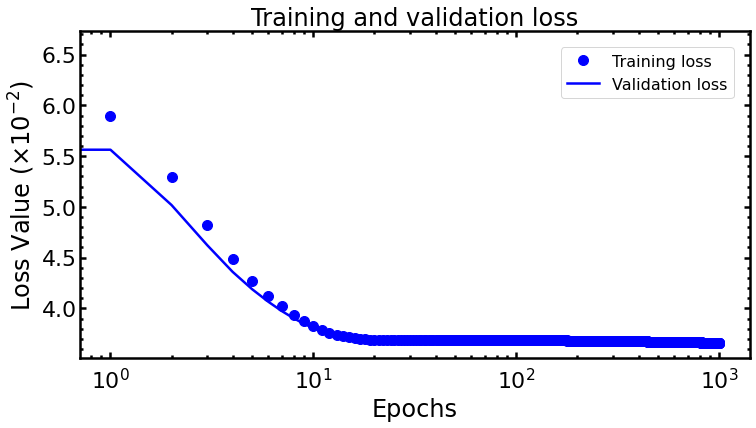

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochr = range(epochs)
plt.figure(figsize=(12,6))
plt.plot(epochr, [i*1e2 for i in loss], 'bo', label='Training loss')
plt.plot(epochr, [i*1e2 for i in val_loss], 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# plt.yscale('log')
plt.ylabel(r'Loss Value ($\times 10^{-2}$)')
plt.xlabel('Epochs')
# plt.yscale('log')
plt.xscale('log')
# plt.xlim(0,epochs)
# ax=plt.gca()
# ax.get_yaxis().get_major_formatter().set_useOffset(False)
# plt.ticklabel_format(useOffset=False,axis='y')
plt.show()

In [13]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
np.shape(decoded_imgs)

(853, 120, 250)

In [6]:
encoded_imgs = np.load('/storage/home/nxt5197/work/589_Machine_Learning/plots/data/encoded_imgs3.npy')
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
np.shape(encoded_imgs)

(853, 6)

In [ ]:
import _pickle as cPickle
x_train = cPickle.load( open( "power_matrix.pkl", "rb" ) )
random.sample(range(len(x_train)),1)[0]

591

In [7]:
np.shape(x_train)

(853, 120, 250)

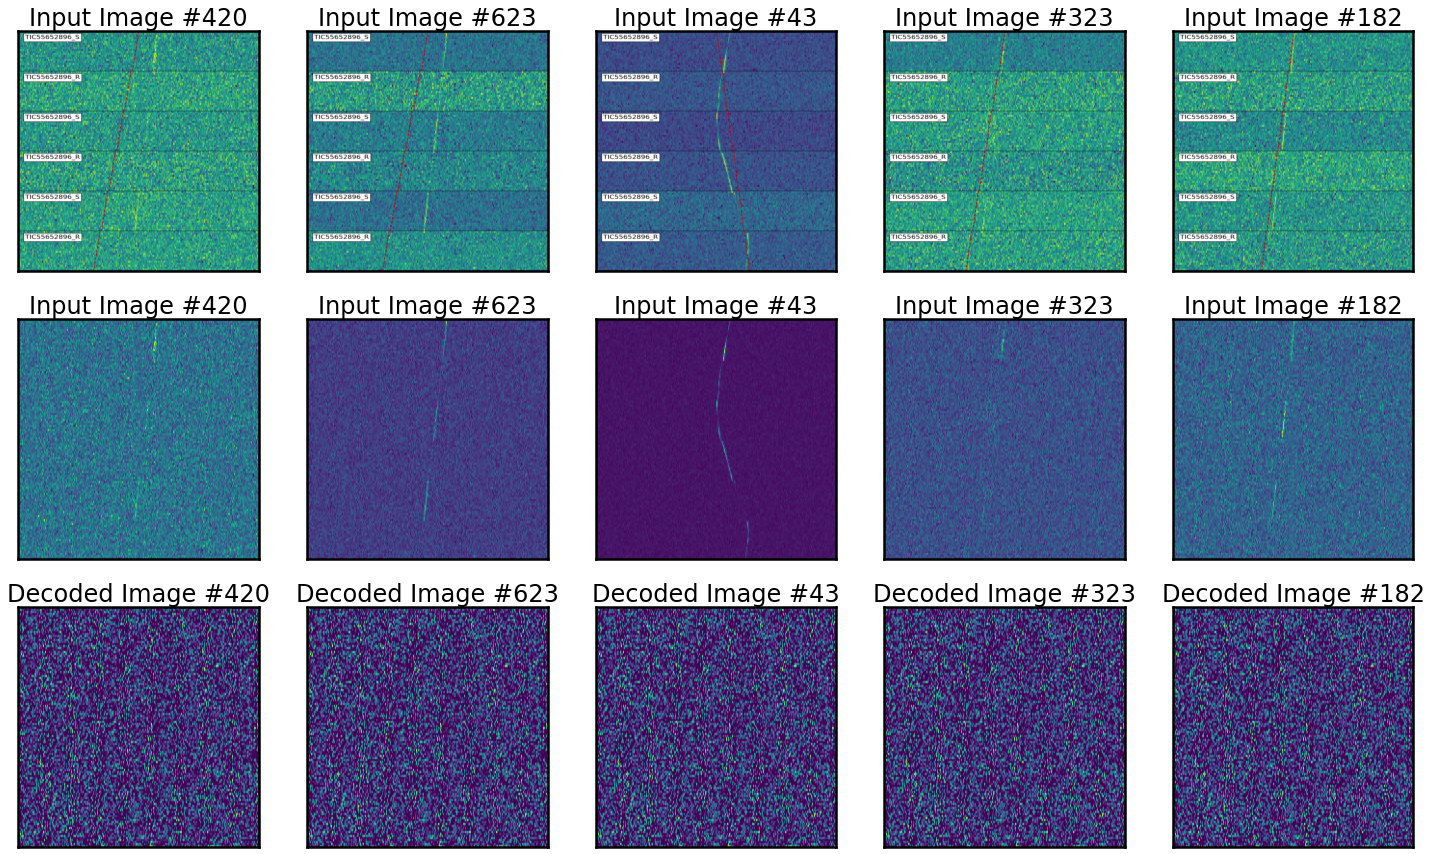

In [8]:
f2_plots = sorted(glob.glob('/storage/home/nxt5197/work/PPO/TOI-216/node_by_node/blc32/Freqs_3904_to_4032/MJDate_59221/plots_TIC55652896_S_f2_snr10.0/*.png'))
h=15
w=25
nrow=3
ncol=5
fig,ax=plt.subplots(figsize=(w,h),nrows=nrow,ncols=ncol)
for i in range(5):
    ran = random.sample(range(len(x_train)),1)[0]
    # Display original
    ax[0,i].set_title(f'Input Image #{ran}')   
    border = (88, 75, 153, 64) # left, top, right, bottom
    img = Image.open(f2_plots[ran])
    cropped_img = ImageOps.crop(img, border) 
    ax[0,i].imshow(cropped_img,aspect='auto')
    ax[0,i].get_xaxis().set_visible(False)
    ax[0,i].get_yaxis().set_visible(False)
    # Display reduced original
    ax[1,i].set_title(f'Input Image #{ran}')
    ax[1,i].imshow(x_train[ran],aspect='auto')
    ax[1,i].get_xaxis().set_visible(False)
    ax[1,i].get_yaxis().set_visible(False)
    # Display reconstruction
    ax[2,i].imshow(decoded_imgs[ran],aspect='auto')
    ax[2,i].set_title(f'Decoded Image #{ran}')
    ax[2,i].get_xaxis().set_visible(False)
    ax[2,i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
# plt.imshow(cropped_img)

In [9]:
r = encoded_imgs
r=r[:, ~np.all(r == 0, axis=0)]
np.shape(encoded_imgs),np.shape(r)#,np.shape(autoencoder.decoder(r).numpy())

((853, 6), (853, 5))

In [14]:
encoded_imgs[28]

array([ 2.635886 ,  0.       , 10.08841  ,  4.7212358,  1.5544764],
      dtype=float32)

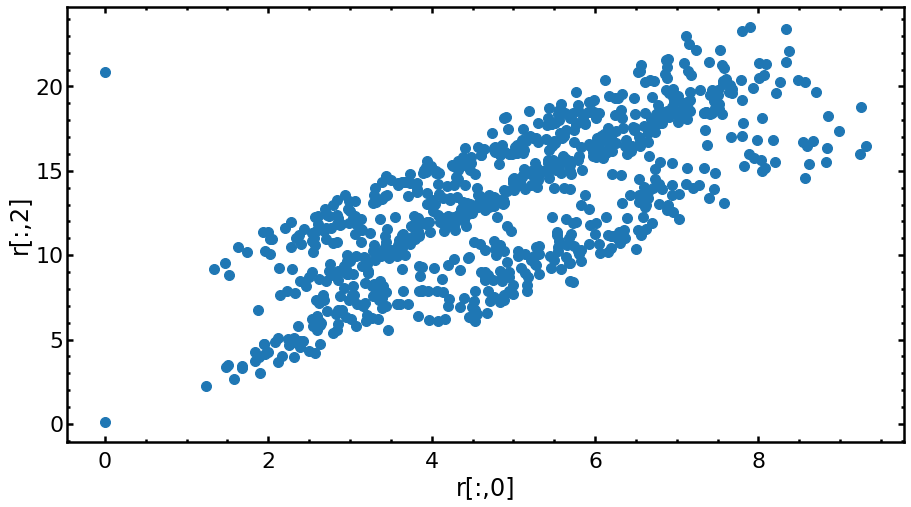

In [15]:
p1, p2 = random.sample(range(np.shape(r)[1]),2)
p1,p2=0,2
plt.plot(r[:,p1],r[:,p2],'o')
plt.xlabel(f'r[:,{p1}]')
plt.ylabel(f'r[:,{p2}]')
plt.show()

In [16]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
# perplexity = 15
# model = TSNE(n_components=2, learning_rate="auto", perplexity=perplexity, verbose=2, init="random", random_state=1, n_iter=1000)
# y_space = model.fit_transform(r)
# x_vals = [x[0] for x in y_space]
# y_vals = [x[1] for x in y_space]
# clustering = DBSCAN(eps=1.5, min_samples=3).fit(np.array(y_space)) #clustering depends heavily on epsilon and min_samples!
# cluster_idx = clustering.labels_
# colors = np.array(["r", "g", "b", "m", "k","y","gray"])
# cmap = colors[cluster_idx % 7]
# plt.scatter(x_vals, y_vals,c=clustering.labels_,vmin=-1,vmax=21,cmap='viridis')#, 50, list(cmap))
# plt.show()

In [24]:
np.shape(encoded_imgs)

(853, 5)

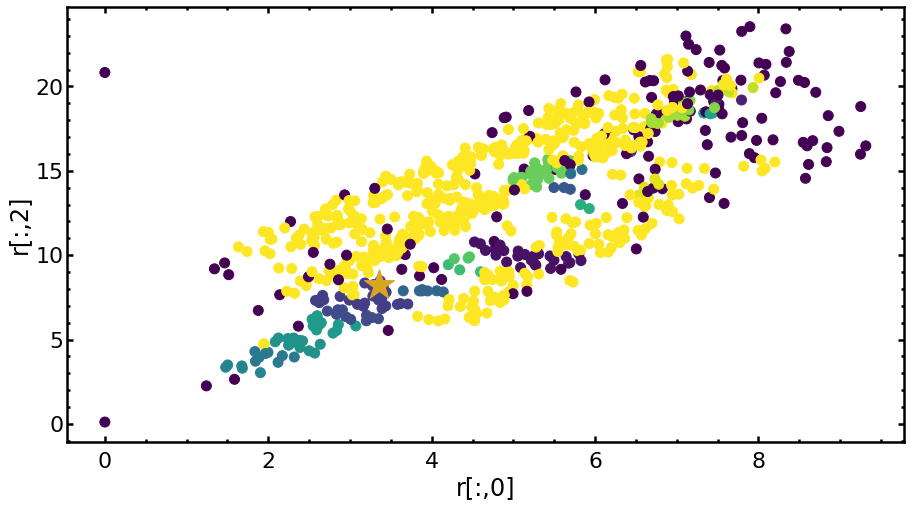

In [34]:
from sklearn.cluster import DBSCAN
y_space = r
x_vals = [x[p1] for x in y_space]
y_vals = [x[p2] for x in y_space]
clustering = DBSCAN(eps=0.5, min_samples=2).fit(np.array(y_space)) #clustering depends heavily on epsilon and min_samples!
cluster_idx = clustering.labels_
# colors = np.array(["r", "g", "b", "m"])#, "k","y","gray"])
# cmap = colors[cluster_idx % 4]
plt.scatter(x_vals, y_vals,c=clustering.labels_,vmin=-1,vmax=21,cmap='viridis')#, 50, list(cmap))
plt.scatter(x_vals[800],y_vals[800],marker='*',s=1000,color='goldenrod')
plt.xlabel(f'r[:,{p1}]')
plt.ylabel(f'r[:,{p2}]')
plt.show()

In [35]:
len(sorted(set(cluster_idx)))
# np.shape(clustering.labels_)

98

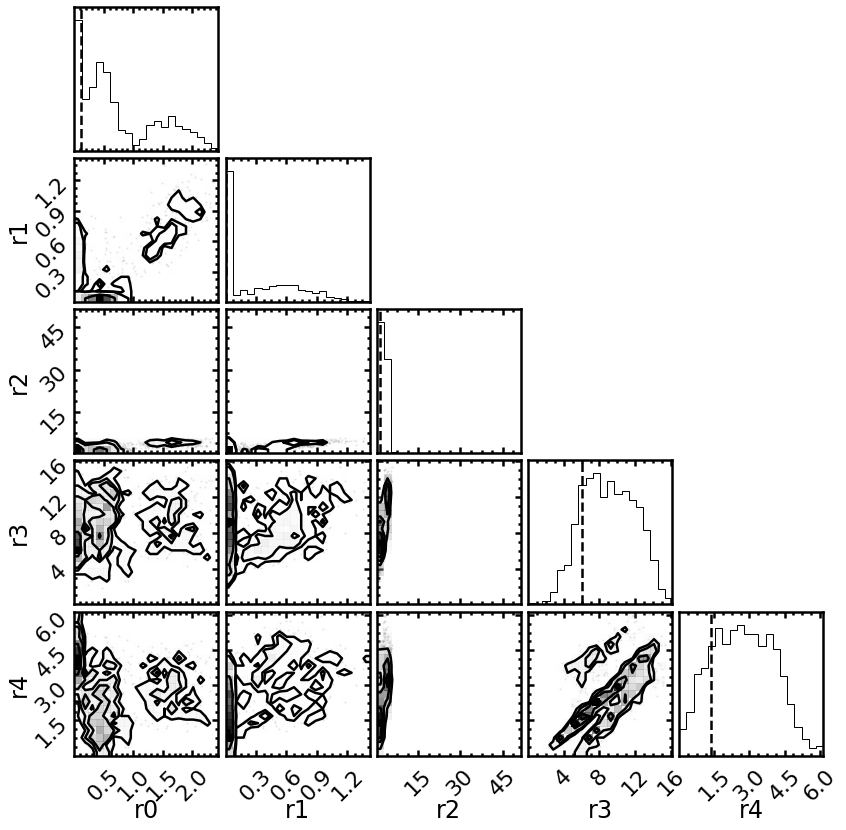

In [10]:
figure = corner.corner(r,
                        labels=[f'r{i}' for i in range(len(r[1]))],
                        quantiles=[0.17751479289940827])

In [14]:
0.17751479289940827*853

151.42011834319527

In [32]:
from sklearn.ensemble import IsolationForest

In [33]:
IF = IsolationForest()
ascore = IF.fit(r).decision_function(r)
isoutlier = IF.fit(r).predict(r)
data = {'Img': f2_plots}
df = pd.DataFrame(data)
df['ascore'] = ascore
df['prediction'] = isoutlier
IF.get_params()

{'bootstrap': False,
 'contamination': 'auto',
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

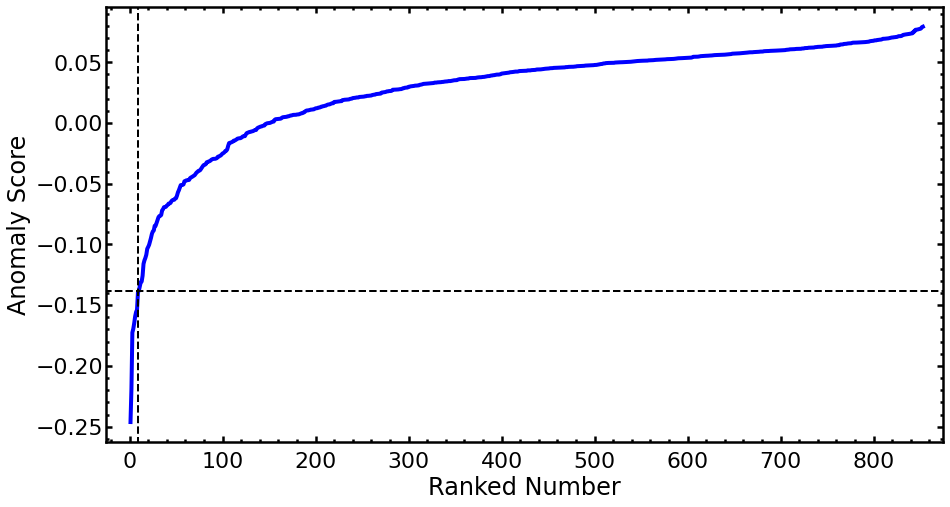

In [34]:
sorted_df = df.sort_values(by = 'ascore').reset_index(drop=False)
plt.plot(np.arange(1,854,1),sorted_df.ascore,linewidth=4,color='b')
plt.ylabel('Anomaly Score')
plt.xlabel('Ranked Number')
yax=plt.gca().get_ylim()
xax=plt.gca().get_xlim()
plt.vlines(9,-1,0.1,linestyles='--',linewidth=2,color='k')
plt.hlines(sorted_df['ascore'][9],-50,900,linestyles='--',linewidth=2,color='k')
plt.ylim(yax[0],yax[1])
plt.xlim(-25,875)
plt.show()

In [ ]:
sorted_df[90:110]

index                                                Img    ascore  \
90     729  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.024718   
91     329  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.024684   
92     791  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.024289   
93     690  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.024269   
94     289  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.021977   
95     200  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.021897   
96     217  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.020879   
97     377  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.020532   
98     778  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.018388   
99     307  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.017253   
100     74  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.016072   
101    427  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.015770   
102    351  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.014132   
103    442  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.014085   
104    832  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.013770   
105     21  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.012742   
106    247  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.012483   
107     49  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.012272   
108    833  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.012244   
109     83  /storage/home/nxt5197/work/PPO/TOI-216/node_by... -0.011782   

     prediction  
90           -1  
91           -1  
92           -1  
93           -1  
94           -1  
95            1  
96           -1  
97           -1  
98           -1  
99           -1  
100          -1  
101          -1  
102           1  
103          -1  
104           1  
105          -1  
106          -1  
107          -1  
108          -1  
109          -1

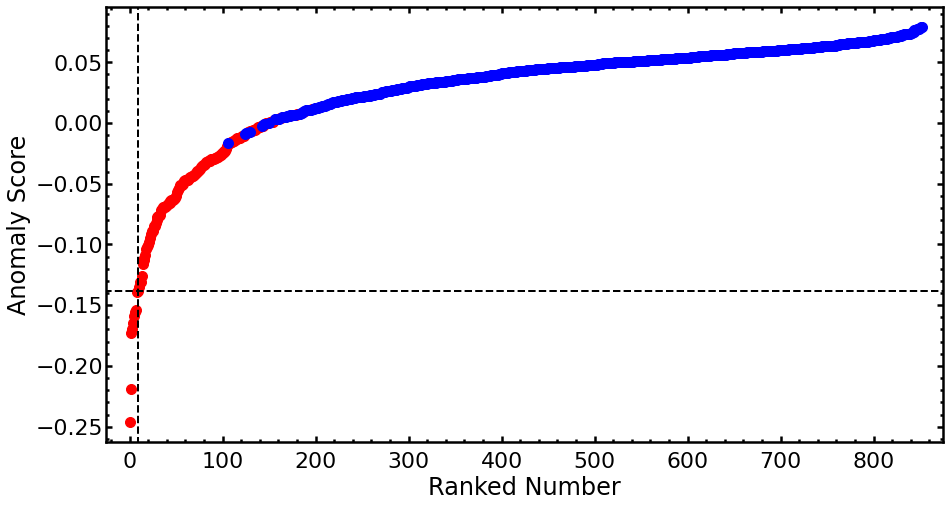

In [35]:
sorted_df = df.sort_values(by = 'ascore').reset_index(drop=False)
# plt.plot(np.arange(1,854,1),sorted_df.ascore,linewidth=4,color='b')
outliers = sorted_df[sorted_df.prediction==-1]
inliers = sorted_df[sorted_df.prediction>-1]
plt.scatter(outliers.index,outliers.ascore,color='r')
plt.scatter(inliers.index,inliers.ascore,color='b')
plt.ylabel('Anomaly Score')
plt.xlabel('Ranked Number')
yax=plt.gca().get_ylim()
xax=plt.gca().get_xlim()
plt.vlines(9,-1,0.1,linestyles='--',linewidth=2,color='k')
plt.hlines(sorted_df['ascore'][9],-50,900,linestyles='--',linewidth=2,color='k')
plt.ylim(yax[0],yax[1])
plt.xlim(-25,875)
plt.show()

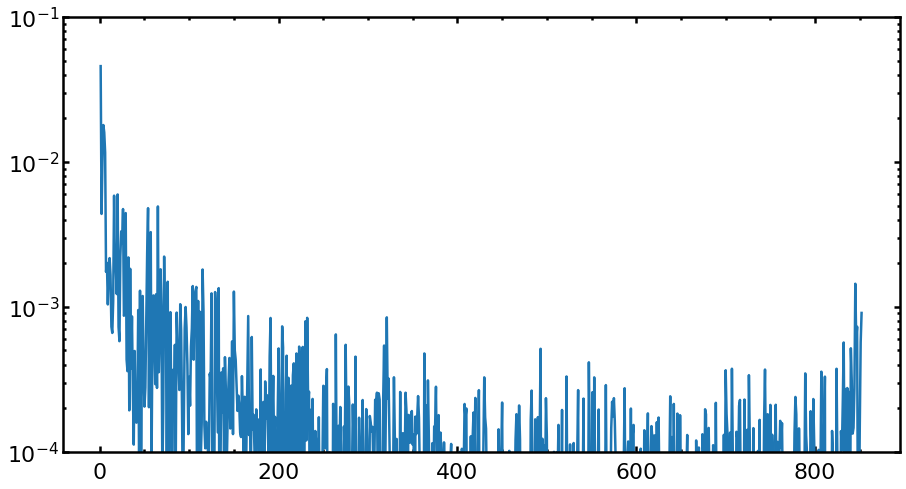

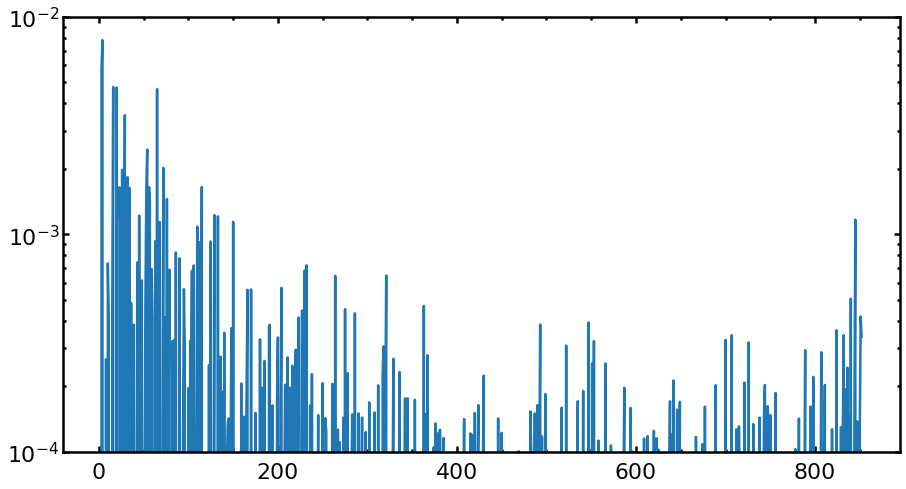

In [ ]:
# der=np.diff(sorted_df.ascore)/np.diff(np.arange(1,854,1))
# newx = np.arange(1,853,1)
# plt.plot(newx,der)
# plt.yscale('log')
# plt.show()
# der2=np.diff(der)/np.diff(newx)
# newx2 = np.arange(1,852,1)
# plt.plot(newx2,der2)
# plt.yscale('log')
# plt.show()
df2=sorted_df.ascore.reset_index(drop=True)
df2.diff(periods=1).plot()
plt.yscale('log')
plt.ylim(1e-4,1e-1)
plt.show()
df2=sorted_df.ascore.reset_index(drop=True)
df2.diff(periods=1).diff(periods=1).plot()
plt.yscale('log')
plt.ylim(1e-4,1e-2)
plt.show()

In [ ]:
np.where(df2.diff(periods=1).diff(periods=1)>3e-3)[0]

array([ 3,  4, 16, 20, 29, 65])

In [ ]:
min(np.where(sorted_df.prediction>-1)[0])

95

In [15]:
100/853

0.11723329425556858

In [ ]:
for i in range(5):
    print(sorted_df.iloc[i])

index                                                       851
Img           /storage/home/nxt5197/work/PPO/TOI-216/node_by...
ascore                                                -0.095042
prediction                                                   -1
Name: 0, dtype: object
index                                                       105
Img           /storage/home/nxt5197/work/PPO/TOI-216/node_by...
ascore                                                -0.094642
prediction                                                   -1
Name: 1, dtype: object
index                                                       115
Img           /storage/home/nxt5197/work/PPO/TOI-216/node_by...
ascore                                                -0.059821
prediction                                                   -1
Name: 2, dtype: object
index                                                        43
Img           /storage/home/nxt5197/work/PPO/TOI-216/node_by...
ascore                             

In [ ]:
sorted_df['Img'][852]

'/storage/home/nxt5197/work/PPO/TOI-216/node_by_node/blc32/Freqs_3904_to_4032/MJDate_59221/plots_TIC55652896_S_f2_snr10.0/f2_TIC55652896_S_dr_0.03_freq_3922.549006.png'

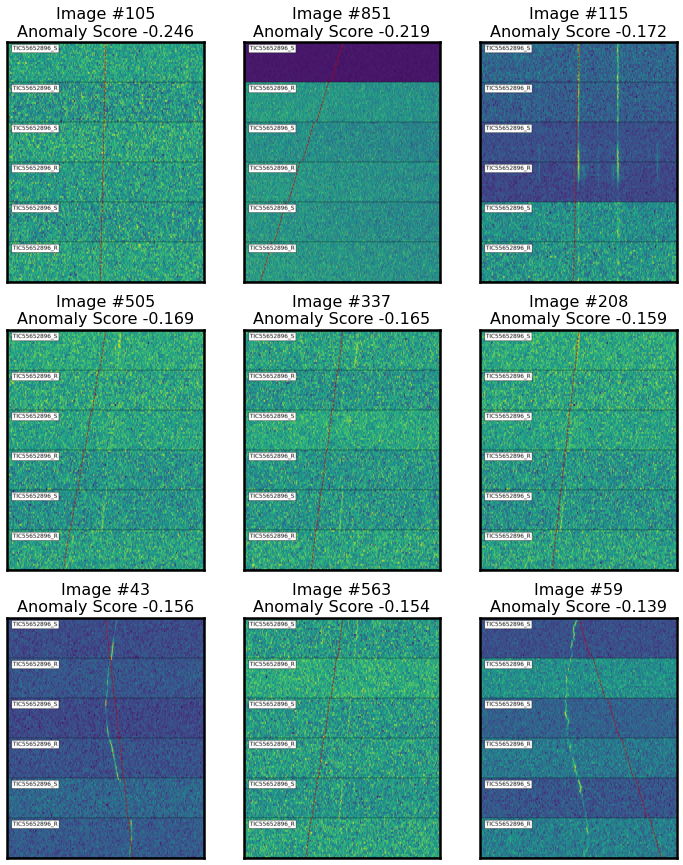

In [38]:
border = (88, 75, 153, 64) # left, top, right, bottom
nrow=0
ncol=0
fig,ax=plt.subplots(figsize=(12,15),nrows=3,ncols=3)
for i in range(9):
    ax[nrow,ncol].set_title(f'Image #{sorted_df["index"][i]}\nAnomaly Score {sorted_df["ascore"][i]:.3f}',fontsize=16)  
    f = sorted_df['Img'][i]
    img = Image.open(f)
    cropped_img = ImageOps.crop(img, border) 
    ax[nrow,ncol].imshow(cropped_img,aspect='auto')
    ax[nrow,ncol].get_xaxis().set_visible(False)
    ax[nrow,ncol].get_yaxis().set_visible(False)
    ncol+=1
    if ncol==3:
        ncol=0
        nrow+=1

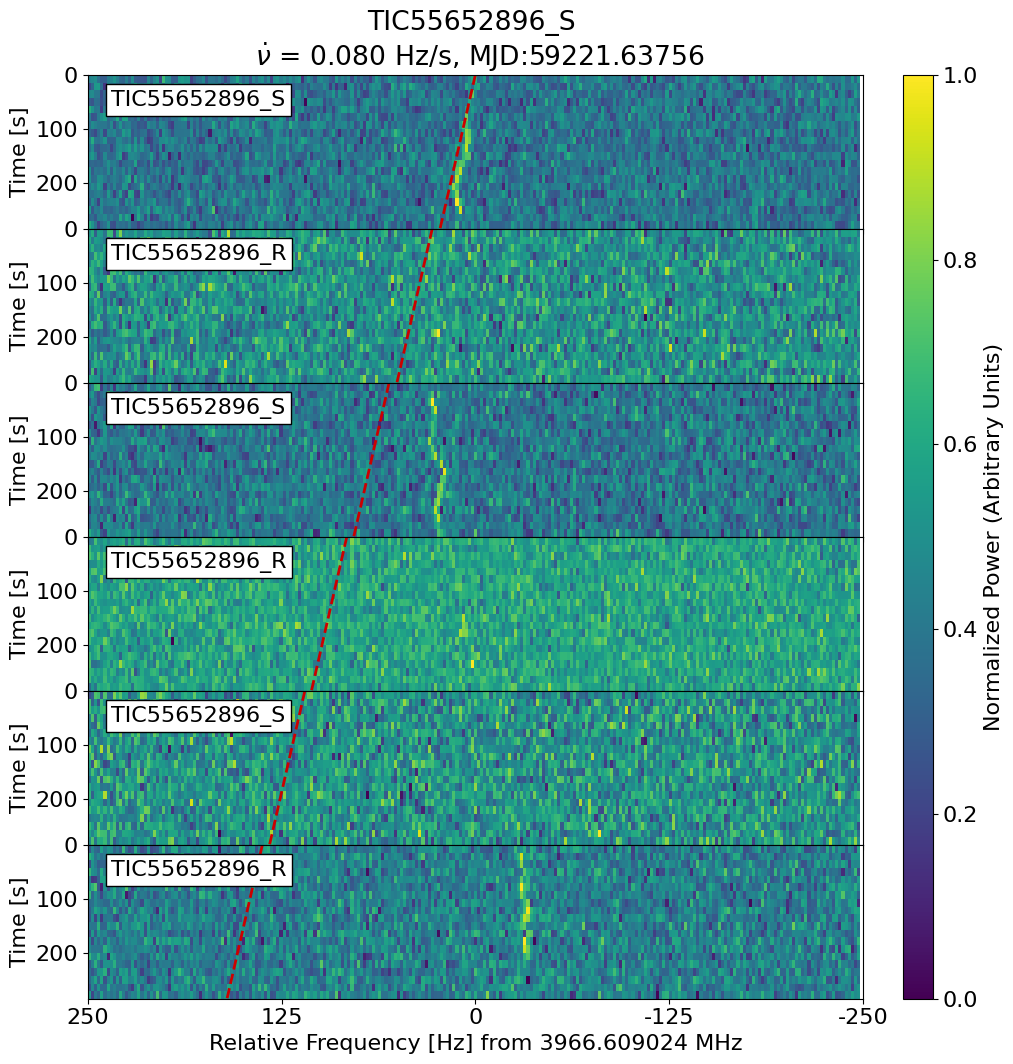

In [39]:
f = sorted_df['Img'][800]
Image.open(f)

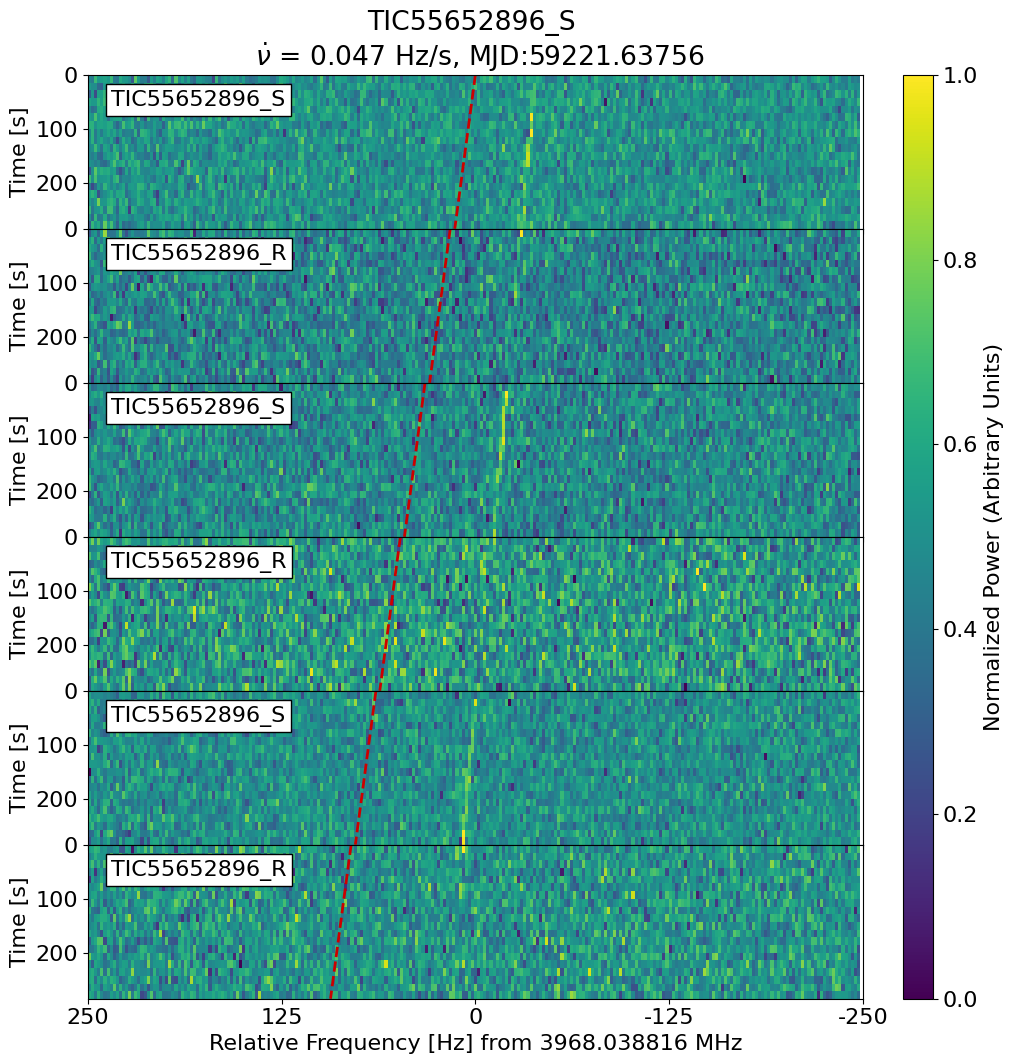

In [37]:
f = sorted_df['Img'][555]
Image.open(f)

In [40]:
print(sorted_df.iloc[800]['Img'])
print(sorted_df.iloc[800])

/storage/home/nxt5197/work/PPO/TOI-216/node_by_node/blc32/Freqs_3904_to_4032/MJDate_59221/plots_TIC55652896_S_f2_snr10.0/f2_TIC55652896_S_dr_0.08_freq_3966.608774.png
index                                                       830
Img           /storage/home/nxt5197/work/PPO/TOI-216/node_by...
ascore                                                  0.06805
prediction                                                    1
Name: 800, dtype: object


In [ ]:
stop = stop 

NameError: name 'stop' is not defined

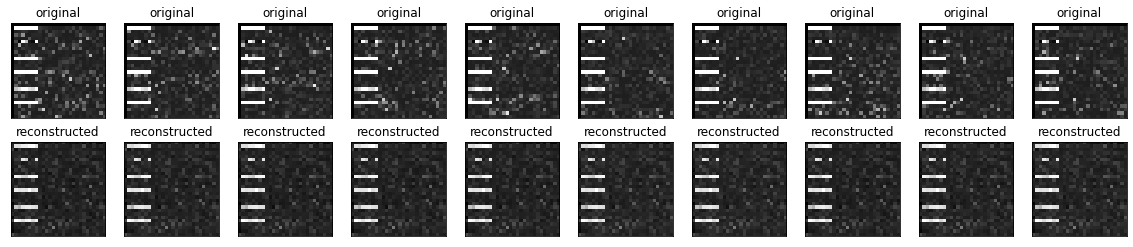

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
x_train = cropped_imgs[:139]+cropped_imgs[196:600]
x_test = cropped_imgs[600:]
x_train = np.array([np.array(np.asarray(x_train[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_train))])
x_test = np.array([np.array(np.asarray(x_test[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_test))])
print(np.shape(x_train),np.shape(x_test))
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(np.shape(x_train),np.shape(x_test))

(543, 925, 772) (211, 925, 772)
(543, 714100) (211, 714100)


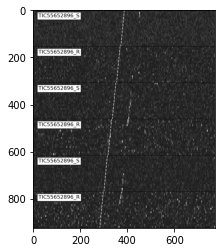

In [ ]:
plt.imshow(x_train[0].reshape(925,772))

In [ ]:


# latent_dim = 64 

# class Autoencoder(Model):
#   def __init__(self, latent_dim):
#     super(Autoencoder, self).__init__()
#     self.latent_dim = latent_dim   
#     self.encoder = tf.keras.Sequential([
#       layers.Flatten(),
#       layers.Dense(latent_dim, activation='relu'),
#     ])
#     self.decoder = tf.keras.Sequential([
#       layers.Dense(714100, activation='sigmoid'),
#       layers.Reshape((925, 772))
#     ])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# autoencoder = Autoencoder(latent_dim)

# my_optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4)
# autoencoder.compile(optimizer=my_optimizer, loss=losses.MeanSquaredError())

# autoencoder.fit(x_train, x_train,
#                 epochs=10,
#                 batch_size=1,
#                 validation_data=(x_test, x_test))

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(714100,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(714100, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

my_optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4)
autoencoder.compile(optimizer=my_optimizer, loss='binary_crossentropy',metrics=['accuracy'])

x_train = cropped_imgs[:139]+cropped_imgs[196:600]
x_test = cropped_imgs[600:]
x_train = np.array([np.array(np.asarray(x_train[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_train))])
x_test = np.array([np.array(np.asarray(x_test[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_test))])
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
3/3 [==============================] - 9s 3s/step - loss: 0.6931 - accuracy: 0.0000e+00 - val_loss: 0.6928 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 8s 2s/step - loss: 0.6920 - accuracy: 0.0000e+00 - val_loss: 0.6829 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 9s 2s/step - loss: 0.6771 - accuracy: 0.0000e+00 - val_loss: 0.6392 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 7s 2s/step - loss: 0.6266 - accuracy: 0.0000e+00 - val_loss: 0.5603 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 8s 2s/step - loss: 0.5512 - accuracy: 0.0000e+00 - val_loss: 0.4926 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 8s 2s/step - loss: 0.5042 - accuracy: 0.0000e+00 - val_loss: 0.4721 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: 0.4969 - accuracy: 0.0000e+00 - val_loss: 0.4565 - val_accura

In [ ]:
# encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 32), found shape=(211, 64)

In [ ]:
# original_dim = 925 * 772
# intermediate_dim = 64
# latent_dim = 2

# inputs = keras.Input(shape=(original_dim,))
# h = layers.Dense(intermediate_dim, activation='relu')(inputs)
# z_mean = layers.Dense(latent_dim)(h)
# z_log_sigma = layers.Dense(latent_dim)(h)

# from keras import backend as K

# def sampling(args):
#     z_mean, z_log_sigma = args
#     epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
#                               mean=0., stddev=0.1)
#     return z_mean + K.exp(z_log_sigma) * epsilon

# z = layers.Lambda(sampling)([z_mean, z_log_sigma])

# # Create encoder
# encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# # Create decoder
# latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
# x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
# outputs = layers.Dense(original_dim, activation='sigmoid')(x)
# decoder = keras.Model(latent_inputs, outputs, name='decoder')

# # instantiate VAE model
# outputs = decoder(encoder(inputs)[2])
# vae = keras.Model(inputs, outputs, name='vae_mlp')

# reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
# reconstruction_loss *= original_dim
# kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
# kl_loss = K.sum(kl_loss, axis=-1)
# kl_loss *= -0.5
# vae_loss = K.mean(reconstruction_loss + kl_loss)
# vae.add_loss(vae_loss)
# vae.compile(optimizer='adam')

# vae.fit(x_train, x_train,
#         epochs=10,
#         batch_size=32,
#         validation_data=(x_test, x_test))

# y_test = cmap[-len(x_test):]
# batch_size=32
# x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
# plt.figure(figsize=(6, 6))
# plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
# plt.colorbar()
# # plt.savefig('/storage/home/nxt5197/work/589_Machine_Learning/plots/VAE_test.pdf',format='pdf')
# plt.show()

In [ ]:
# y_test = cmap[-len(x_test):]
# batch_size=32
# x_test_encoded,_,_ = encoder.predict(x_test, batch_size=batch_size)
# plt.figure(figsize=(6, 6))
# plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
# plt.colorbar()
# # plt.savefig('/storage/home/nxt5197/work/589_Machine_Learning/plots/VAE_test.pdf',format='pdf')
# plt.show()

In [ ]:
# x_test_encoded[:,0]

# PCA, t-SNE, DBSCAN

In [ ]:
import os
import glob
import numpy as np

# To run PCA, t-SNE, and DBSCAN algorithms
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


from PIL import Image
from PIL import ImageOps

In [ ]:
f3_plots = sorted(glob.glob('/storage/home/nxt5197/work/PPO/TOI-216/node_by_node/f3_plots/*.png'))

cropped_imgs = [0 for i in range(len(f3_plots))] 
for i,f in enumerate(f3_plots):
    border = (88, 75, 153, 64) # left, top, right, bottom
    img = Image.open(f)
    # image.show()
    cropped_imgs[i] = ImageOps.crop(img, border)

x_all = cropped_imgs[:139]+cropped_imgs[196:]
x_all = np.array([np.array(np.asarray(x_all[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_all))])
print(np.shape(x_all))
x_all = x_all.reshape((len(x_all), np.prod(x_all.shape[1:])))
print(np.shape(x_all))

(754, 925, 772)
(754, 714100)


### PCA

[0.0980084  0.05393342]
2 components account for 15.2% of the total explained variance.


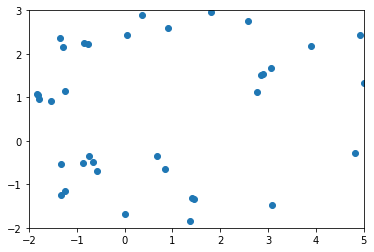

In [ ]:
n_components = 2 # Change to see how it affects the total explained variance!

pca = PCA(n_components=n_components)
pca.fit(x_all)
y_space_pca = pca.transform(x_all)

print(pca.explained_variance_ratio_)
print("%d components account for %.01f%% of the total explained variance." % (n_components, \
                                                                              (sum(pca.explained_variance_ratio_)*100.)))
plt.scatter(y_space_pca[:,0], y_space_pca[:,1])
plt.xlim((-2, 5))
plt.ylim((-2, 3)) # feel free to unsnip box to see the far outliers
plt.show()

### t-SNE

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 754 samples in 0.474s...
[t-SNE] Computed neighbors for 754 samples in 40.369s...
[t-SNE] Computed conditional probabilities for sample 754 / 754
[t-SNE] Mean sigma: 13.089934
[t-SNE] Computed conditional probabilities in 0.045s
[t-SNE] Iteration 50: error = 79.3817596, gradient norm = 0.3972336 (50 iterations in 0.255s)
[t-SNE] Iteration 100: error = 78.1252823, gradient norm = 0.5218496 (50 iterations in 0.207s)
[t-SNE] Iteration 150: error = 81.0088425, gradient norm = 0.4199589 (50 iterations in 0.205s)
[t-SNE] Iteration 200: error = 74.8640823, gradient norm = 0.4387775 (50 iterations in 0.210s)
[t-SNE] Iteration 250: error = 75.5620880, gradient norm = 0.5757432 (50 iterations in 0.206s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.562088
[t-SNE] Iteration 300: error = 1.7292448, gradient norm = 0.0098853 (50 iterations in 0.249s)
[t-SNE] Iteration 350: error = 1.4880698, gradient norm = 0.0027430

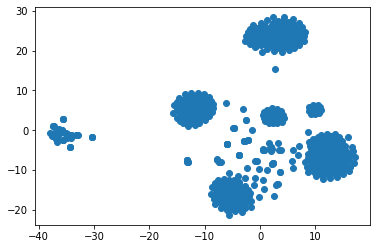

In [ ]:
perplexity = 15

model = TSNE(n_components=2, learning_rate="auto", perplexity=perplexity, verbose=2, init="random", random_state=1, n_iter=1000)
y_space = model.fit_transform(x_all)
x_vals = [x[0] for x in y_space]
y_vals = [x[1] for x in y_space]
plt.scatter(x_vals, y_vals)
plt.show()

### DBSCAN

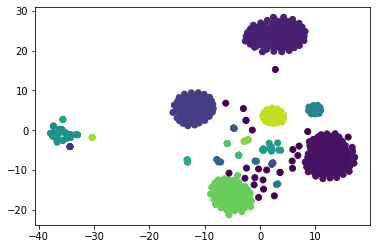

In [ ]:
clustering = DBSCAN(eps=1.5, min_samples=3).fit(np.array(y_space)) #clustering depends heavily on epsilon and min_samples!
cluster_idx = clustering.labels_
colors = np.array(["r", "g", "b", "m", "k","y","gray"])
cmap = colors[cluster_idx % 7]
plt.scatter(x_vals, y_vals,c=clustering.labels_,vmin=-1,vmax=21,cmap='viridis')#, 50, list(cmap))
plt.show()

In [ ]:
clustering.labels_

array([ 0,  0, 17,  1,  1,  1,  2,  3, -1,  4,  5,  5,  6, -1,  6, -1,  6,
        7, -1,  8,  9,  9, 10,  9,  4, -1, -1, 10, 11, 10, -1, -1, -1, -1,
        7, -1, -1, -1, 10, 11, -1, 11, 10, 10, 10, 12, 12, 12, -1,  5, 11,
       13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15,  2,
        2,  2,  2, 16, -1, 16, 17, 16, -1, -1, -1, 18, 18, 18,  3,  3,  3,
       -1, 11, 11, 18, 18, 18, -1,  3, -1, 19, 19, 19, 10, 10, 10, 10, 10,
       10, 11, 18, 18, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 19, 19, 19,  4,  4, -1,
        5,  5,  7, -1, -1, 20, 20, 20, 10, 10, 10, 21, 21, 21,  0,  0,  0,
        0,  0,  0,  0,  0,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2, 17, 17, -1, -1, 17, 17, 17, 17, 16, 17, 17, 16, 17,
       -1, 16, -1, -1, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        0,  0,  0, -1,  8, -1,  0,  8,  0,  0,  8,  8,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

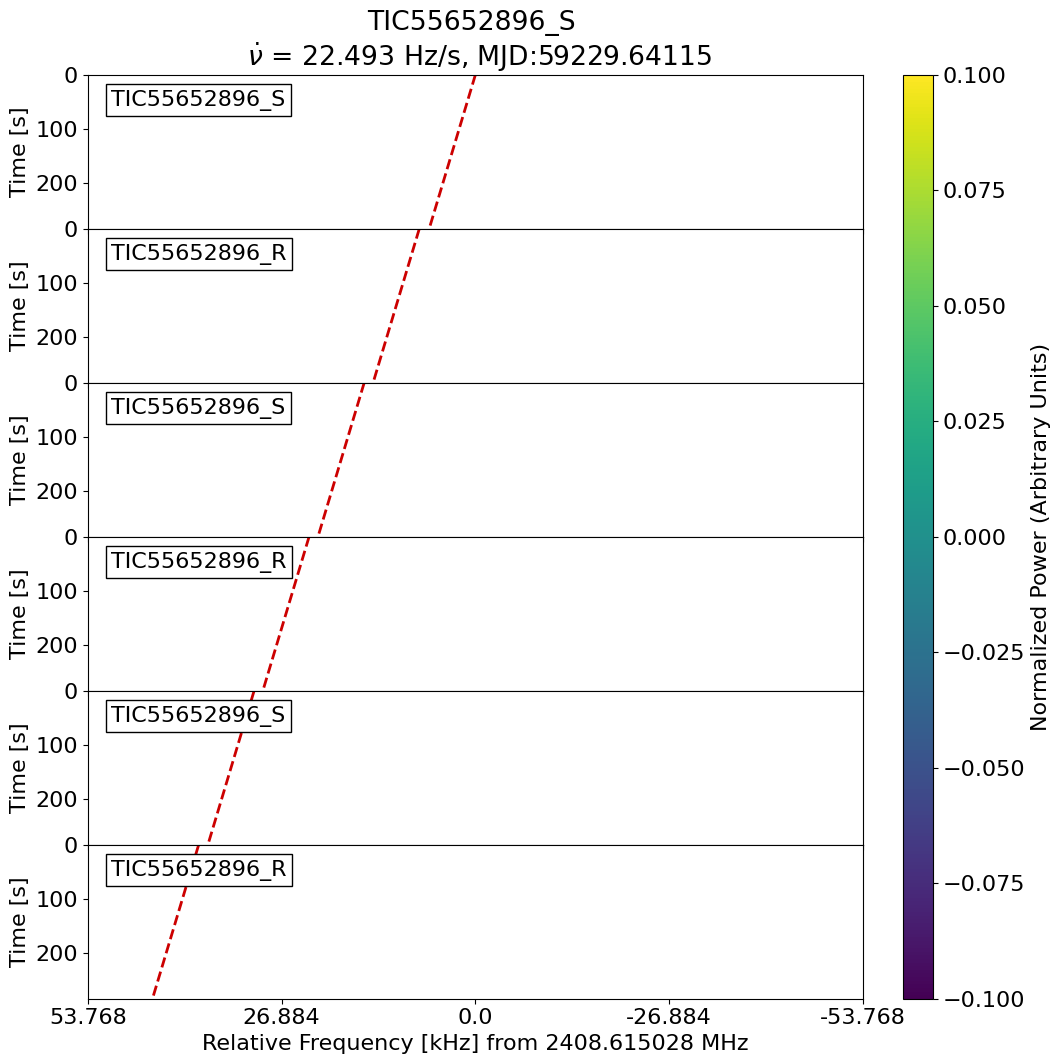

In [ ]:
f = f3_plots[np.where(cmap=='m')[0][20]]
img = Image.open(f)
img.show()

In [ ]:
cmap

array(['r', 'r', 'g', 'b', 'b', 'b', 'm', 'r', 'k', 'k', 'r', 'r', 'r',
       'r', 'r', 'm', 'r', 'r', 'k', 'g', 'b', 'b', 'b', 'b', 'k', 'r',
       'r', 'b', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b',
       'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'm', 'm', 'm', 'm', 'k', 'k', 'k',
       'k', 'k', 'm', 'm', 'm', 'm', 'r', 'r', 'r', 'g', 'r', 'g', 'r',
       'k', 'k', 'k', 'k', 'r', 'r', 'r', 'r', 'r', 'r', 'k', 'k', 'k',
       'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'r',
       'k', 'k', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'r', 'r', 'r', 'k', 'k', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b',
       'b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm',
       'm', 'm', 'm', 'm', 'm', 'g', 'g', 'g', 'g', 'g', 'g', 'g

In [ ]:
original_dim = 925 * 772
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

vae.fit(x_train, x_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_test, x_test))

y_test = cmap[-len(x_test):]
batch_size=32
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
# plt.savefig('/storage/home/nxt5197/work/589_Machine_Learning/plots/VAE_test.pdf',format='pdf')
plt.show()

Epoch 1/10
17/17 [==============================] - 13s 680ms/step - loss: nan - val_loss: nan
Epoch 2/10
17/17 [==============================] - 11s 643ms/step - loss: nan - val_loss: nan
Epoch 3/10
17/17 [==============================] - 12s 689ms/step - loss: nan - val_loss: nan
Epoch 4/10
17/17 [==============================] - 11s 668ms/step - loss: nan - val_loss: nan
Epoch 5/10
17/17 [==============================] - 11s 638ms/step - loss: nan - val_loss: nan
Epoch 6/10
17/17 [==============================] - 11s 632ms/step - loss: nan - val_loss: nan
Epoch 7/10
17/17 [==============================] - 11s 629ms/step - loss: nan - val_loss: nan
Epoch 8/10
17/17 [==============================] - 10s 617ms/step - loss: nan - val_loss: nan
Epoch 9/10
17/17 [==============================] - 11s 624ms/step - loss: nan - val_loss: nan
Epoch 10/10
17/17 [==============================] - 11s 630ms/step - loss: nan - val_loss: nan


TypeError: list indices must be integers or slices, not tuple

<Figure size 432x432 with 0 Axes>

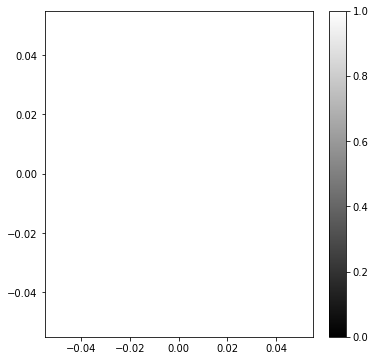

In [ ]:
y_test = cmap[-len(x_test):]
batch_size=32
x_test_encoded,_,_ = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
# plt.savefig('/storage/home/nxt5197/work/589_Machine_Learning/plots/VAE_test.pdf',format='pdf')
plt.show()